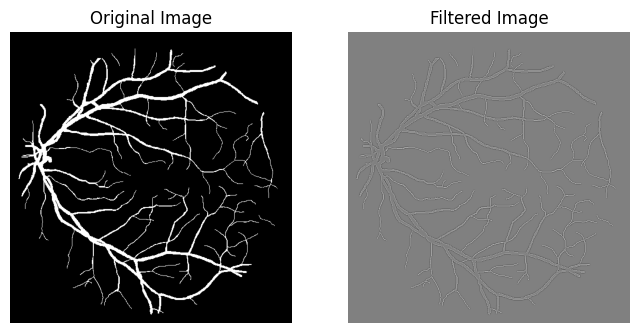

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


mask_path = "/dhc/dsets/DRIVE/training/1st_manual/21_manual1.gif"
with Image.open(mask_path) as im:
    img = np.array(im.convert("L"))
img[img > 0] = 1
img = torch.from_numpy(img).float().unsqueeze(0)

# Define the convolutional kernel (3x3 kernel as an example)
kernel_weights = torch.tensor([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]], dtype=torch.float32)  # Sobel filter for edge detection

# Reshape kernel to match PyTorch's expected dimensions (out_channels, in_channels, kernel_height, kernel_width)
kernel = kernel_weights.unsqueeze(0).unsqueeze(0)  # Shape (1, 1, 3, 3)

# Apply the convolution
output = F.conv2d(img, kernel, stride=1, padding=1)  # Use padding=1 to keep the same size

# Visualize the original image and the result
original_image = img.squeeze().numpy()
filtered_image = output.squeeze().detach().numpy()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()